# Useful Links

https://pythonmatplotlibtips.blogspot.com/2018/01/rotate-elevation-angle-animation-3d-python-matplotlib-pyplot.html

## Packages

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import math

## Mandelbrot set iteration

In [2]:
def mandelbrot_numpy(c, maxiter):
    output = np.zeros(c.shape)
    z = np.zeros(c.shape, np.complex64)
    for it in range(maxiter):
        notdone = np.less(z.real*z.real + z.imag*z.imag, 4.0)
        output[notdone] = it
        z[notdone] = z[notdone]**2 + c[notdone]
    output[output == maxiter-1] = 0
    return output

In [3]:
def mandelbrot_set(xmin,xmax,ymin,ymax,width,height,maxiter):
    r1 = np.linspace(xmin, xmax, width, dtype=np.float32)
    r2 = np.linspace(ymin, ymax, height, dtype=np.float32)
    c = r1 + r2[:,None]*1j
    n3 = mandelbrot_numpy(c,maxiter)
    return (r1,r2,n3.T)

## Mandelbrot set 3D

<IPython.core.display.Javascript object>


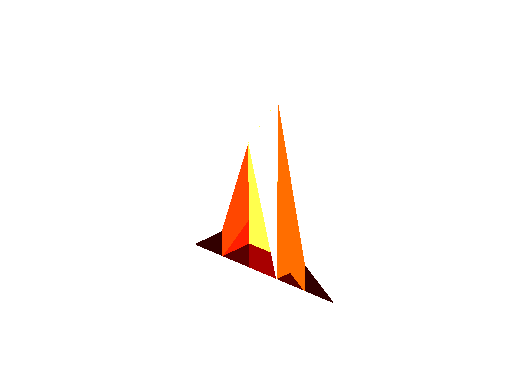

In [4]:
%matplotlib notebook


# Quadrillage
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)

# Paramètres de la fonction mandelbrot_set
xmin,xmax = np.min(X),np.max(X)
ymin,ymax = np.min(Y),np.max(Y)
width = 10
height = 10
maxiter =10

k,l,m = mandelbrot_set(xmin,xmax,ymin,ymax,width,height,maxiter)

# Create a figure and a 3D Axes
fig = plt.figure()
ax = Axes3D(fig)
ax.axis('off')

def init():
    # Plot the surface.
    ax.plot_surface(k,l,m, cmap='hot',linewidth=0, antialiased=False)
    return fig,

def animate(i):
    # elevation angle
    ax.view_init(elev=(i-45), azim=0)
    return fig,

# Animate
ani = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20, blit=True)